In [6]:
import numpy as np
from scipy import stats

# 1. T-Test Code

In [7]:
N = 10
a = np.random.randn(N) + 2
b = np.random.randn(N)

In [10]:
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
s = np.sqrt((var_a + var_b) / 2)
t = (a.mean() - b.mean()) / (s * np.sqrt(2.0/N))
df = 2*N - 2
p = 1 - stats.t.cdf(t, df=df)

In [13]:
print("t: ", t, " p: ", 2*p)

t:  4.75170025641  p:  0.000159356559109


In [14]:
t2, p2 = stats.ttest_ind(a, b)
print("t: ", t, " p: ", p2)

t:  4.75170025641  p:  0.000159356559109


# 2. T-TEST Exercise

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('./advertisement_clicks.csv')

In [49]:
df.count()

advertisement_id    2000
action              2000
dtype: int64

In [50]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [22]:
print(df['advertisement_id'].unique(), df['action'].unique())

['B' 'A'] [1 0]


In [23]:
a = df[df['advertisement_id'] == 'B']
b = df[df['advertisement_id'] != 'B']

In [27]:
print(a.count(), b.count())

advertisement_id    1000
action              1000
dtype: int64 advertisement_id    1000
action              1000
dtype: int64


In [30]:
t, p = stats.ttest_ind(a['action'], b['action'])
print("t: ", t, " p: ", p)

t:  3.2211732138  p:  0.00129719054671


In [33]:
print(a['action'].mean(), b['action'].mean())

0.372 0.304


# 3. Chi Square Test

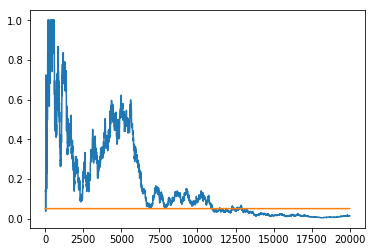

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2


def get_p_value(T):
    expected_matrix = np.zeros((2, 2)).astype(np.float32)

    expected_matrix[0, 0] = (T[0, :].sum() / T.sum()) * (T[:, 0].sum() / T.sum())*T.sum()
    expected_matrix[0, 1] = (T[0, :].sum() / T.sum()) * (T[:, 1].sum() / T.sum())*T.sum()
    expected_matrix[1, 0] = (T[1, :].sum() / T.sum()) * (T[:, 0].sum() / T.sum())*T.sum()
    expected_matrix[1, 1] = (T[1, :].sum() / T.sum()) * (T[:, 1].sum() / T.sum())*T.sum()

    c2 = ((T - expected_matrix)**2 / expected_matrix).sum()
    p = 1 - chi2.cdf(x=c2, df=1)

    return p


def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)

    for i in range(N):
        c1, c2 = data.next()
        T[0, c1] += 1
        T[1, c2] += 1

        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)

    plt.plot(p_values)
    plt.plot(np.ones(N) * 0.05)
    plt.show()


run_experiment(0.1, 0.11, 20000)

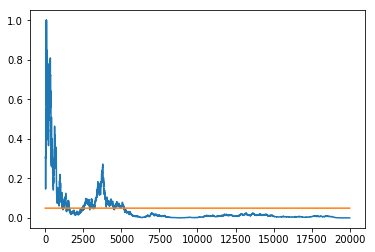

In [44]:
run_experiment(0.1, 0.11, 20000)

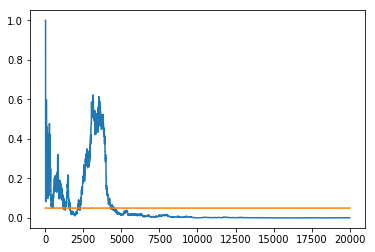

In [45]:
run_experiment(0.1, 0.11, 20000)

# 4. Chi Square exercise

In [51]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [52]:
help(scipy.stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [56]:
array = df.groupby('advertisement_id').sum()

In [58]:
array['no action'] = df.groupby('advertisement_id').count() - array

In [61]:
chi2 = scipy.stats.chi2_contingency(array)

In [64]:
p = chi2[1]

In [65]:
print("p value: ", p)

p value:  0.00153926116235
